# Titanic - Machine Learning from Disaster
Officially, this would be my very first data science project, as well as my very first kaggle competition. I hope that through this competition I would be able to take home some data science processes and implement effective ML models as part of my submission.class, etc).

## The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

**In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).**

## Exploratory Data Analysis (EDA) and Preparation
Before we jump into building a ML model, its is crucial that we understand the nature of the data and prepare it. Here are some steps that serves not as a rule but as a guideline.
1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing Values Treatment
5. Outlier Treatment
6. Variable Transformation
7. Variable Creation

Let's begin by importing the libraries which we would be using and loading the training dataset.

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
train_df = pd.read_csv('data/train.csv')

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Looking at the central tendency, dispersion of the dataset's distribution, we are immediately brought to attention to a few things.
1. 38% of the passengers survived the Titanic.
2. There are missing values that are in the dataset - Age
3. There are outliers in the *Fare* column of the dataset, see std deviation and 75th percentile(31) compared to the max(512). We should drop this.

### Variable Identification
In this step, we identify every variable by discovering its type, understand what it represents, and change its datatype according to our needs.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<u>Variables</u>

*PassengerId*: An integer to uniquely number each passenger.

*Survived*: An integer indicating if a passenger survived. 0 = No, 1 = Yes.

*Pclass*: An integer representing a proxy for socio-economic status (SES). 1 = Upper, 2 = Middle, 3 = Lower

*Name*: Name of the passenger.

*Sex*: Sex of the passenger.

*Age*: A float representing the age of the passenger. Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

*SibSp*: An integer representing the number of siblings or spouses a passenger has aboard the Titanic.<br>
Sibling = brother, sister, stepbrother, stepsister.<br>
Spouse = husband, wife (mistresses and fiancés were ignored)

*Parch*: An integer representing the number of parents or children a passenger has aboard the Titatnic.<br>
Parent = mother, father<br>
Child = daughter, son, stepdaughter, stepsnon
Some children travelled only with a nanny, therefore parch=0 for tm.

*Ticket*: The ticket number of the passenger.

*Fare*: A float representing the passenger fare.

*Cabin*: Cabin number of the passenger.

*Embarked*: Port of embarkation.m.

### Univariate Analysis
Let's analyze the data of each variable and discuss what story the data tries to tell us.
#### Socio-economic Status

[Text(0.5, 1.0, '# of Passengers in each class (SES)')]

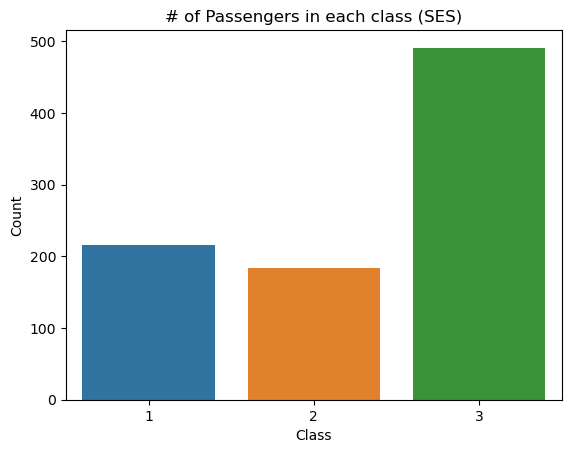

In [7]:
pclass_counts = train_df['Pclass'].value_counts()
pclass_counts = pclass_counts.reset_index()
pclass_counts.columns = ['Class', 'Count']
sns.barplot(data=pclass_counts, x='Class', y='Count').set(title='# of Passengers in each class (SES)')

We can see that most of the passengers aboard the Titanic were in the lower SES category, and there were slightly more upper class passengers compared to middle class passengers.
#### Sex
Let's look at the number of men compared to women on the Titanic.

[Text(0.5, 1.0, 'Sex of passengers aboard the Titanic')]

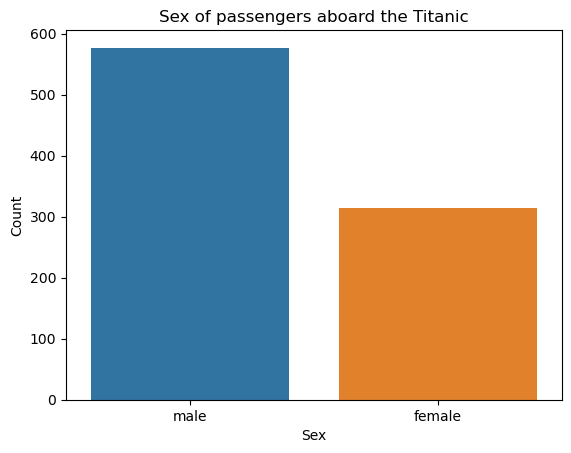

In [8]:
sex_counts = train_df['Sex'].value_counts()
sex_counts = sex_counts.reset_index()
sex_counts.columns = ['Sex', 'Count']
sns.barplot(data=sex_counts, x='Sex', y='Count').set(title='Sex of passengers aboard the Titanic')

Here we see that there were about twice as many males compared to females on the ship.
#### Age
Taking a look at the age range of the passengers,

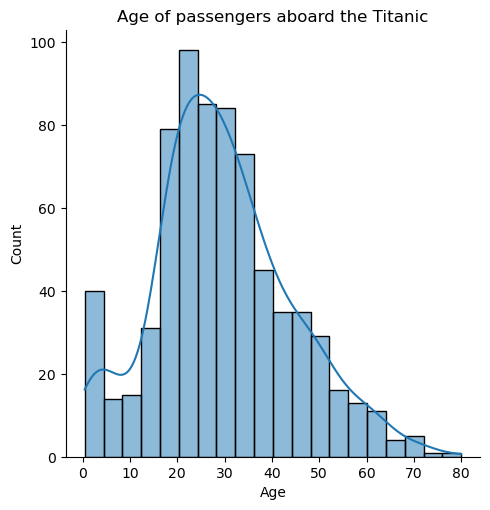

In [9]:
sns.displot(data=train_df, x='Age', kde=True, bins=20).set(title='Age of passengers aboard the Titanic')

We see that the age of most passengers fall between the age of 20-30 years old.
#### Sibsp/Parch
Now let's look at the general number of siblings/spouse and parents/children that each passenger has had on board.

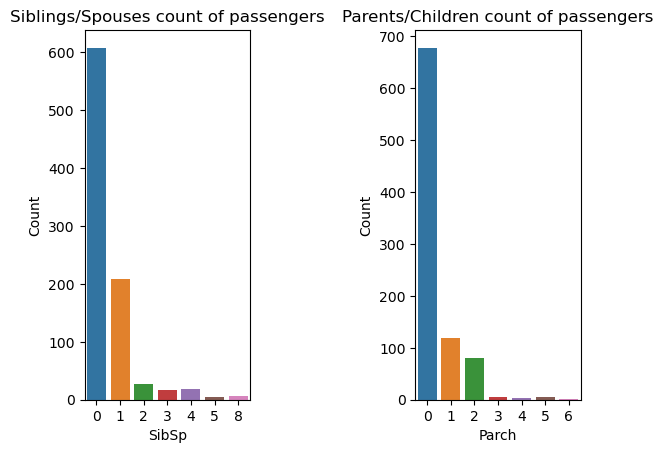

In [10]:
# sibsp
plt.subplot(1,2,1)
sibsp_counts = train_df['SibSp'].value_counts()
sibsp_counts = sibsp_counts.reset_index()
sibsp_counts.columns = ['SibSp', 'Count']
sns.barplot(data=sibsp_counts, x='SibSp', y='Count').set(title='Siblings/Spouses count of passengers')
# parch
plt.subplot(1,2,2)
parch_counts = train_df['Parch'].value_counts()
parch_counts = parch_counts.reset_index()
parch_counts.columns = ['Parch', 'Count']
sns.barplot(data=parch_counts, x='Parch', y='Count').set(title='Parents/Children count of passengers')
plt.subplots_adjust(wspace=1)

We see here that majority of passengers was aboard the Titanic alone. Now let's perform Bivariate Analysis and discuss the interactions that different variables have with each other.
### Bivariate Analysis
Firstly, let's take a look at the ratio of survivors in the male and female subsets.

Percentage of male survivors to female survivors:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


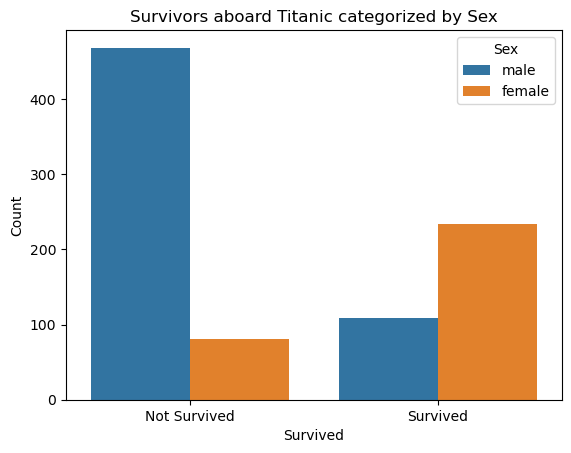

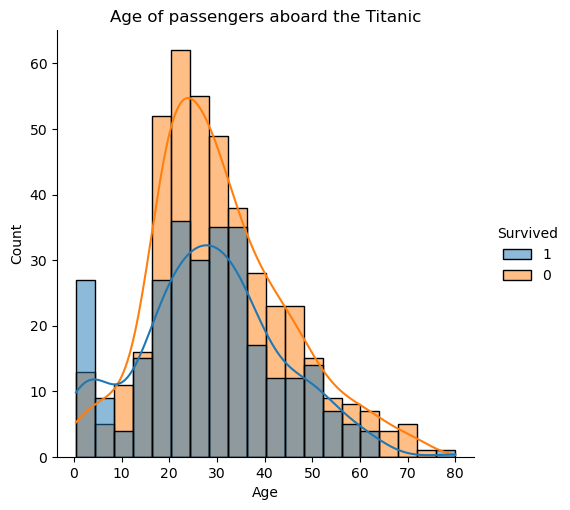

In [115]:
sex_survived_counts = train_df.groupby('Survived')['Sex'].value_counts().reset_index(name='Count')
sex_survived_counts['Survived'] = sex_survived_counts['Survived'].map({0:'Not Survived', 1:'Survived'})
sns.barplot(data=sex_survived_counts, x='Survived', y='Count', hue='Sex').set(title='Survivors aboard Titanic categorized by Sex')

#age_survived_counts = train_df.groupby('Survived')['Age'].value_counts().reset_index(name='Count')
#age_survived_counts['Survived'] = age_survived_counts['Survived'].map({0:'Not Survived', 1:'Survived'})
sns.displot(data=train_df, x='Age', kde=True, bins=20, hue='Survived', hue_order=[1,0]).set(title='Age of passengers aboard the Titanic')

# Average # of survivors by percentage
print("Percentage of male survivors to female survivors:")
print(train_df.groupby('Sex')['Survived'].mean())

We see here that females were much more likely to survive at 74% as compared to males 19%. Looking at the KDE/Hist plot, we see that survival rate of younger passengers(~14y/o and below) were higher than survival rates of older passengers (14y/o above). This could possibly be due to woman and children being priority in the evacuation.

What does the statistics say when we put SES into the equation?

Male Survivors (Mean)
Pclass
1    0.368852
2    0.157407
3    0.135447
Name: Survived, dtype: float64

Female Survivors (Mean)
Pclass
1    0.968085
2    0.921053
3    0.500000
Name: Survived, dtype: float64


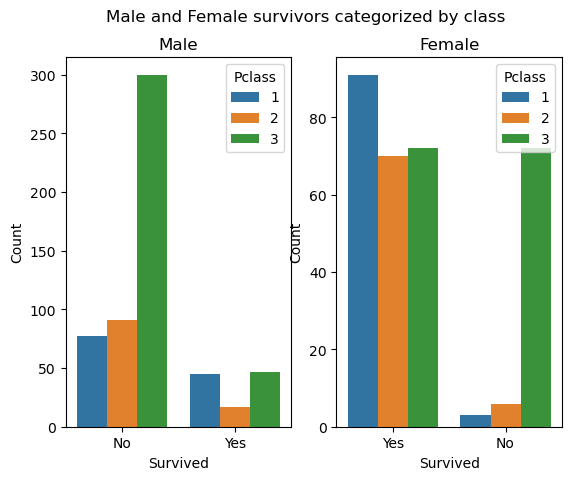

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Male and Female survivors categorized by class')
male_pclass_survived_df = train_df.loc[train_df['Sex'] == 'male'].groupby('Pclass')['Survived'].value_counts().reset_index(name='Count')
male_pclass_survived_df['Survived'] = male_pclass_survived_df['Survived'].map({0:'No', 1:'Yes'})
sns.barplot(ax=ax1, data=male_pclass_survived_df, x='Survived', y='Count', hue='Pclass').set(title='Male')
print('Male Survivors (Mean)')
print(train_df.loc[train_df['Sex'] == 'male'].groupby('Pclass')['Survived'].mean())

female_pclass_survived_df = train_df.loc[train_df['Sex'] == 'female'].groupby('Pclass')['Survived'].value_counts().reset_index(name='Count')
female_pclass_survived_df['Survived'] = female_pclass_survived_df['Survived'].map({0:'No', 1:'Yes'})
sns.barplot(ax=ax2, data=female_pclass_survived_df, x='Survived', y='Count', hue='Pclass').set(title='Female')
print('\nFemale Survivors (Mean)')
print(train_df.loc[train_df['Sex'] == 'female'].groupby('Pclass')['Survived'].mean())

By looking deeper into the data, we find that males in first class are 3 times more likely to survivor compared to those in third class. Females in first class also have a higher chance of survivor than those in third class. What about survivors in regards to age and SES?

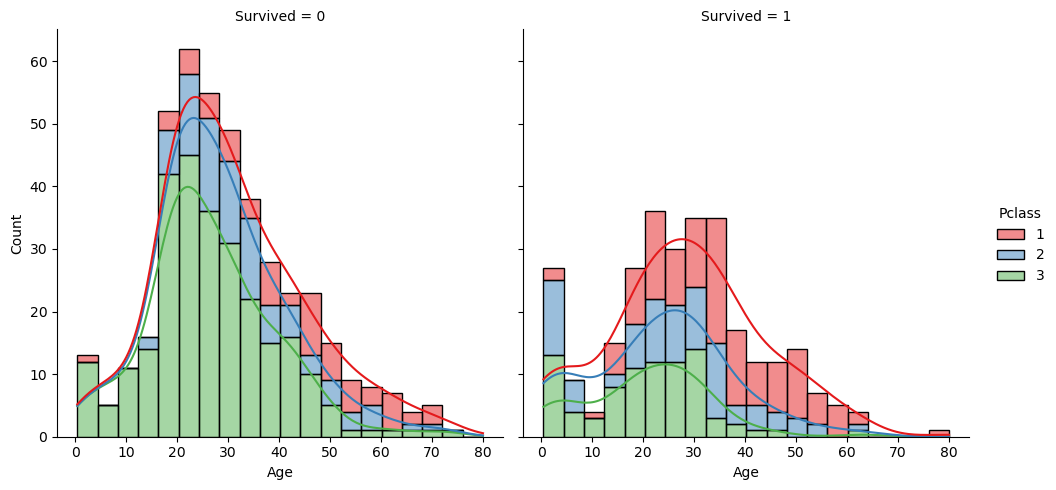

In [125]:
sns.displot(train_df, x="Age", hue="Pclass",multiple='stack', palette='Set1', hue_order=[1, 2, 3], col="Survived", kde=True, bins=20)

From this KDE plot, we can see that throughout most age ranges, with the exception of 10 and below, survivors were mostly from first class